In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("magazine_reviews_cleanup.tsv", sep="\t")

In [3]:
df

,overall,vote,verified,reviewTime,reviewerName,reviewText,summary
0,5,0,True,"07 14, 2014",Alvey,great read every issue,Five Stars
1,3,0,True,"06 24, 2014",Jeff A Milne,magazine great times technology magazines new ...,Great While it lasted
2,5,0,True,"06 1, 2014",P. R THOMPSON,ive read maximum pc mpc many years articles te...,For Both the Newbie and The Advanced PC User
3,5,0,True,"05 15, 2014",Earle Williams,ordered magazine grandson then 7 going 30 wasi...,Great Gift
4,4,0,True,"03 28, 2014",JJM,subscribed nook version years thoroughly enjoy...,Decent magazine at a good price
...,...,...,...,...,...,...,...
58649,5,0,True,"08 16, 2016",Katie Reid,nice surprise boyfriend really enjoyed olympic...,Quick Delivery
58650,1,0,True,"08 10, 2016",John,magazine looks like printed recycled shoe rubb...,One Star
58651,5,0,True,"07 31, 2016",Jeff Johnson,cant go wrong si subscription pleased,great magazine
58652,5,0,True,"10 5, 2017",David Lashaway,magazine far time favorite one metal detecting...,Favorite metal detecting magazine


In [4]:
five_star_reviews = df.loc[df.overall == 5]
one_star_reviews = df.loc[df.overall == 1]

In [5]:
len(five_star_reviews)

38070

In [6]:
len(one_star_reviews)

5171

In [7]:
one_star_words = one_star_reviews.assign(word = one_star_reviews["reviewText"].str.split()).explode("word")["word"]
five_star_words = five_star_reviews.assign(word = five_star_reviews["reviewText"].str.split()).explode("word")["word"]
one_star_words.head()

45    unbelievable
45          amount
45             ads
45               5
45            year
Name: word, dtype: object

In [8]:
counted_one_star: dict[str, int] = (one_star_words.value_counts()).head(1000).to_dict()
counted_five_star: dict[str, int] = (five_star_words.value_counts()).head(1000).to_dict()

In [9]:
wc_one_star = WordCloud(width=1200, height=500, max_words=500).generate_from_frequencies(counted_one_star)
wc_one_star.to_file("one_star_wordcloud.png")
wc_five_star = WordCloud(width=1200, height=500, max_words=500).generate_from_frequencies(counted_five_star)
wc_five_star.to_file("five_star_wordcloud.png")

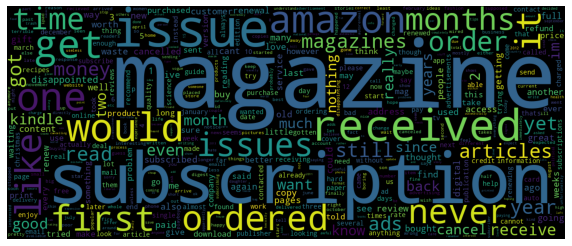

In [10]:
plt.figure(figsize=(10, 10))
plt.imshow(wc_one_star)
plt.axis('off')
plt.show()

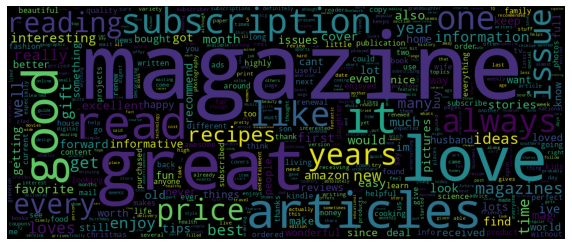

In [11]:
plt.figure(figsize=(10, 10))
plt.imshow(wc_five_star)
plt.axis('off')
plt.show()